 ## **Author's Objective**

This notebook is was used to help the author understand the basics of exploratory data analysis and creating and end-to-end machine learning pipeline. This is the first attempt at machine learning by the author and his first foray. 

 ## **Details**

Introductory notebook on ML basics from Kaggle.
<br>
https://www.kaggle.com/c/titanic
<br>
Completed Jan 2024

 ## **Challenge Objective**

Create a model that predicts which passengers survived the Titanic shipwreck.

 ## **Workflow**

- Import libraries
- Import datasets
- Data pre-processing
- Test feature correlation against target variable (single)
- Test feature correlation against target variable (multiple)
- Feature engineering
- Drop features
- Convert to ml ready format
- Split training and test data
- Select model
- Test and predict for selected models 

## **Import Libraries**

In [1]:
# data analysis

import pandas as pd #data manipulation and handling
import numpy as np #mathematical functions
import random as rd #to generate random data 

# visulisation

import seaborn as sns #drawing statistical plots
import matplotlib.pyplot as plt #plotting graphs
%matplotlib inline 

# machine learning

#logistic function for binary classification
from sklearn.linear_model import LogisticRegression 
#support vector machine, linear and non-linear classification using kernels
from sklearn.svm import SVC, LinearSVC 
#ensemble classification method with multiple decision trees
from sklearn.ensemble import RandomForestClassifier 
#classifies data points based on 'K' nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
#implements gaussian naive bayes algorithm for classification
from sklearn.naive_bayes import GaussianNB 
# a type of linear classifier that classifies objects into binary classes
from sklearn.linear_model import Perceptron
#stochastic gradient descent classifier, implements a linear classifier with stochastic gradient descent learning
from sklearn.linear_model import SGDClassifier 
#creates a model that predicts the value of a target variable by learning simple decision rules from the data features
from sklearn.tree import DecisionTreeClassifier 

# evaluation
from sklearn.metrics import accuracy_score

## **Import Datasets**

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
combine_df = [train_df, test_df]

## **Data Pre-processing**

#### **Check Features**

In [3]:
# understand dataset features
print(train_df.columns.values)
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Data Dictionary** 

| Variable | Defintion | Key |
|----|-----|-----|
|survival|survival|0 = no, 1 = yes|
|pclass|ticket class| 1 = 1st, etc|
|sex|sex||
|age|age in years||
|sibsp|# of siblings/spouse onboard||
|parch|# of parents/children onboard||
|ticket|ticker number||
|fare|passenger fare||
|cabin|cabin number||
|embarked|port of embarkation|c = cherbourg, q = queenstown, s = southampton|

#### **Understand feature types**

Understanding these allow us to select the appropriate plots for visulisation
<br>
<br>
categorical: survived, sex, embarked
<br>
ordinal: pclass #data whose order carries significance
<br>
numerical - continous: survival, age, sibsp, parch, fare
<br>
numerical - discrete: nil
<br>
numerical - timeseries: nil
<br>
mixed data types: ticket, cabin

#### **Check for blank, null or empty values & object types**
<br>
We would need to correct these features and help us in converting later

In [4]:
print('_'*40)
print('Training Data')
print('_'*40)
train_df.info()
print('_'*40)
print('Test Data')
print('_'*40)
test_df.info()

________________________________________
Training Data
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
Test Data
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 en

**Training Data:**
* Age (177 missing)
* Cabin (687 missing)
* Embarked (2 missing)


**Test Data**
  * Age (86 missing)
  * Fare (1 missing)
  * Cabin (327 missing)

#### **Decision**

To fill age, embarked and fare features. Drop cabin as high count of missing values.

#### **Check Descriptive Statistics**
To help with the feature selection later

In [5]:
# check descriptive statistics for numerical data only
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insights from training data (numerical)**
* check mean
* check range
* check data validity (if missing a lot)

**Higher Survival Rate**
<br>
Training data survival rate 38%, actual survival rate was 32%.

**Even Passenger Class Distribution**
<br>
Evenly distributed at 2.31, slight skew to lower classes

**Broad Age Range**
<br>
Average age 29.7 years, however missing data values might skew the result. Range of 0.4 - 80 years old

**Half travelled alone, some big families onboard**
<br>
Mean was 0.523 and range was 0-8.

**Most travelled without family**
<br>
Mean of 0.381.

**Large range of fares, some travelled free**
<br>
Min of 0, standard deviation of 49.7, which is larger than the mean of 32.2, indicating a large sd.

In [6]:
# check descriptive statistics for categorical data only
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Insights from training data (categorical)**

**Some passengers shared cabins**
<br>
Unique values of 147 which is lesser than the total count.

**S port is most common for embarkation**
<br>
Highest frequency at 644. 72% of total passengers.

**More males than females onboard**
<br>
65% males

**Many duplicate tickets**
<br>
24% of tickets are duplicated.

**Conclusions for data pre-processing (Part 1)**

**Completing**

* What features are worth completing null/missing values for 

**Correcting**

* Drop high null/missing ratio
* Drop features not linked to target variable
* Drop high duplicate ratio

**Creating**

* What features can be combined?
* What features can be extracted?
* What feature types can be changed?

1. Create a new feature to get total count of family members on board
2. Extract title from name feature
3. Create new feature for age band. Change it from numerical to cateogorical
4. Fare range feature if it might help

**Classifying**

* What assumptions can we dervive from the earlier insights?

**Corelation**

* What features can we do quick correlations for? Test against modelled correlations later 

## **Data Pre-Processing Table - Update 1**

Below is a consolidation of the conclusions and actions to be made on features based on the preliminary analysis thus far.

| Feature | Status | Action | Reason |
|----|-----|-----|----|
|Survived|-|-|Target Variable|
|Pclass|In Progress|Test correlation|Assumption that upper class passenger are more likely to survive|
|Sex|In Progress|Test correlation|Assumption that women are more likely to survive|
|SibSp|In Progress|Test correlation, create family member feature|Assumption that children are more likely to survive|
|Parch|In Progress|Test correlation, create family member feature|Assumption that children are more likely to survive|
|Name|In Progress|Create New Feature, drop name|Extract title|
|Fare|In Progress|Create New Feature|Fare Range might yield insights|
|Age|In Progress|Fill missing values, create age band|Might have correlation to survival|
|Embarked|In Progress|Fill missing values|Might have correlation to survival|
|Ticket|Dropped|-|High ratio of duplicate tickets (22%)|
|PassengerId|Dropped|-|Does not contribute to survival rates|
|Cabin|Dropped|-|Too many null values (77% missing or null)|


## **Analysis through Pivoting Features**


Quickly analyse and test above conclusions by pivoting features against each other.

#### **Correlation between Pclass and Survival**

In [7]:
# test corerelation for Pclass and survival/...

(train_df[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index = False)
    .mean()
    .sort_values(by=['Survived'], ascending = False)
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Result**

Assumption proven that **first class passengers have a higher survival rate**. (63%)

#### **Correlation between Sex and Survival**

In [8]:
# test correlation for sex and survival

(train_df[['Sex','Survived']]
    .groupby(['Sex'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending = False)
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Result**

Assumption proven that **females have a higher survival rate.** (74%)

#### **Correlation between Sibling/Spouse and Survival**

In [9]:
# test correlation between sibling/spouse and surival

(train_df[['SibSp','Survived']]
    .groupby(['SibSp'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending = False)
)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Result**

Zero correlation for certain features. To extract individual features.

#### **Correlation between Parent/Children and Survival**

In [10]:
# test correlation betwween parent/children and survival

(train_df[['Parch','Survived']]
    .groupby(['Parch'], as_index=False)
    .mean()
    .sort_values(by=['Survived'], ascending = False)
)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Result**

Zero correlation for certain features. To extract individual features.

## **Analysis through Visualisation**

Access the correlation between numerical features and target variable (survived)

#### **Age & Survival:**

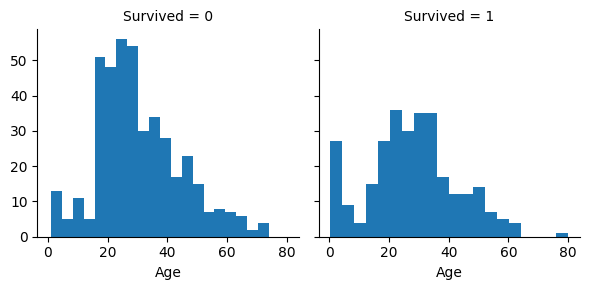

In [11]:
# analyse if there is a correlation between survival rate and age 

# splits it into multicharts 
g = sns.FacetGrid(train_df, col = 'Survived')
# plot against age
g.map(plt.hist, 'Age', bins=20)

**Observation**

* Eldest passenger survived
* Many passengers were in the 20-35 age range
* Infants had a high survival rate
* Large number of 20-30 year olds did not survive.

**Decision**

* Age to be included in model training
* To fill in missing values for age
* Consider creating age band groups

#### **Pclass & Survival**

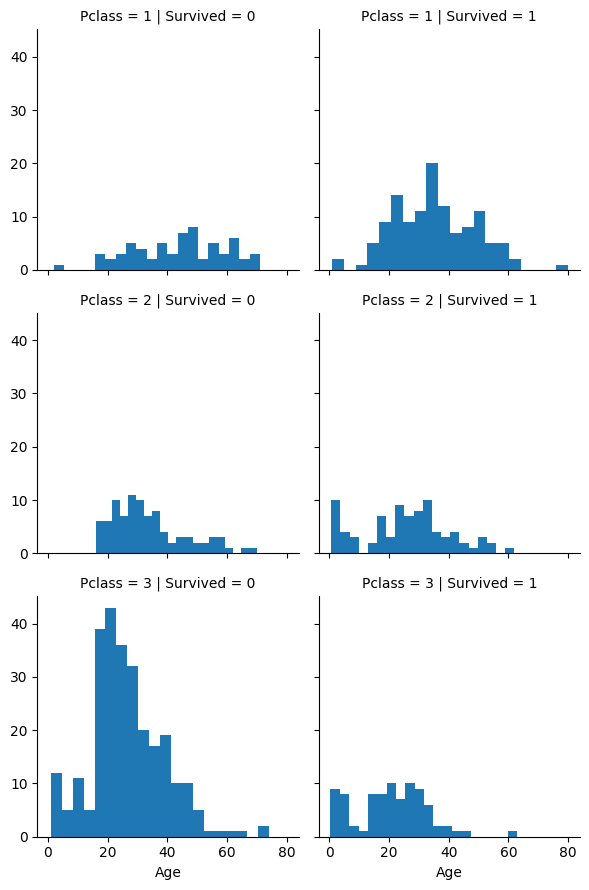

In [12]:
#determine if there is a correlation between each of the Pclass and survival rates

grid = sns.FacetGrid(train_df,col = 'Survived',  row = 'Pclass')
grid.map(plt.hist, 'Age', bins=20)

**Observation**

* Pclass hierachy matters, higher survival rates in 1st class than in 3rd class
* Age is well distributed in each class
* 3rd class has a high number of young-middle age people

**Decision**

* Pclass to be included in model training. 

#### **Embarked, Pclass, Sex to Survived**

c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same eff

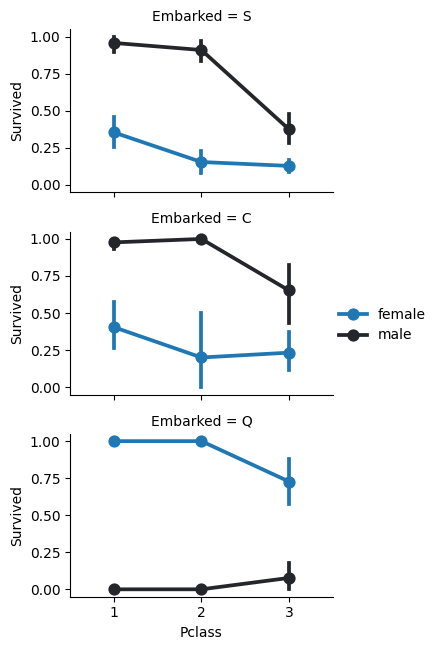

In [13]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',)
grid.add_legend()

In [14]:
# test correlation between embarked and survival

(train_df[['Embarked','Survived']]
    .groupby(['Embarked'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending = False)
)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**Observations**

* more women survived
* port of embarkation suggest a correlation between survival rates

**Results**

* add sex to model training
* complete and add embarkation to model training

#### **Fare, Embarked, Sex and Survived**

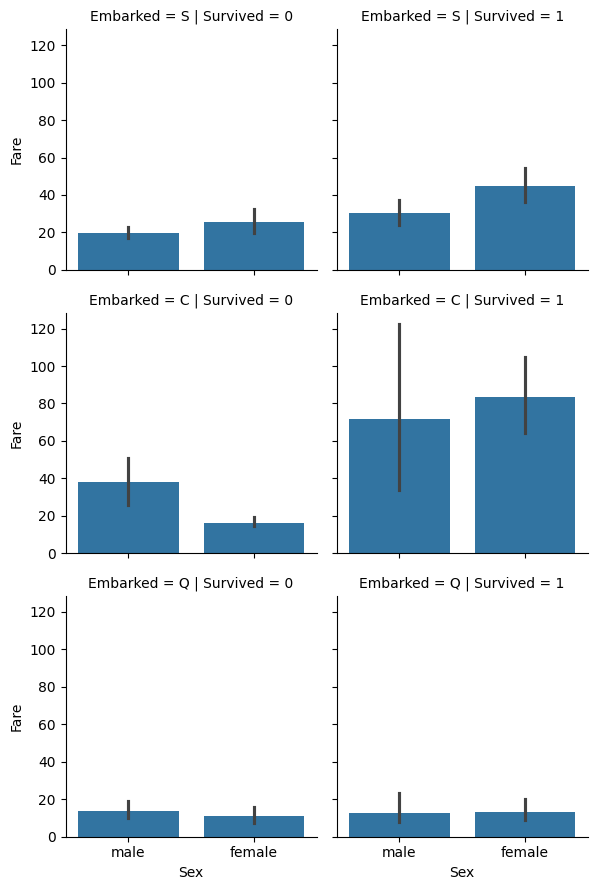

In [15]:
# test correlations between fare, embarked, sex and survived

grid = sns.FacetGrid(train_df, col='Survived', row='Embarked')
grid.map(sns.barplot, 'Sex', 'Fare', order=['male', 'female'])
grid.add_legend()

**Observation**

* Those who paid higher fare had higher survival rates
* Port of embarkation again correlates with survival rates

**Decision**

* Consider banding fare feature

## **Data Pre-Processing Table - Update 2**

| Feature | Status | Action | Reason |
|----|-----|-----|----|
|Survived|-|-|Target Variable|
|PassengerId|-|-|Keep as part of submission requirements|
|----|-----|-----|----|
|SibSp|In Progress|create family member feature|Correlation for some values|
|Parch|In Progress|create family member feature|Correlation for some values|
|Name|In Progress|Create New Feature, drop name|Extract title|
|Fare|In Progress|Create New banding feature|Higher paying fares have higher survival rates|
|Age|In Progress|Fill missing values, create age band|Might have correlation to survival|
|Embarked|In Progress|Fill missing values|Proven correlation to survival rates|
|----|-----|-----|----|
|Pclass|Completed|Add to model training|Proven correlation to survival rates|
|Sex|Completed|Add to model training|Proven correlation to survival rates|
|----|-----|-----|----|
|Ticket|Dropped|-|High ratio of duplicate tickets (22%)|
|Cabin|Dropped|-|Too many null values (77% missing or null)|


#### **Drop features**

In [16]:
#Drop ticket and cabin columns

train_df.drop(['Ticket','Cabin'],axis=1)
test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]

print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### **Extract title and test correlation**

Test if title has a correlation with survival rates

**Extract titles and count by sex**

In [17]:
# extract titles
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# creates crosstabulation table
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**Simplify number of categories**

In [18]:
# simplify categories with replacement

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace([
        'Capt',
        'Col',
        'Countess',
        'Don',
        'Dr',
        'Jonkheer',
        'Lady',
        'Major',
        'Rev',
        'Sir',
    ],
        'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')

**Analyse Titles to Survival Rate**

In [19]:
# print table

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


**Observation**

* Supports hypothesis that women and children have higher survival rates

**Result**

* Add title to model training

**Convert Titles to ordinal features (hierachical/categorical data)**

In [20]:
# create title mapping dictionary

title_mapping = {'Mrs':1,'Miss':2,'Master':3,'Rare':4,'Mr':5}

In [21]:
# map titles to numbers and handle missing values

for dataset in combine:
    dataset["Title"] = dataset['Title'].map(title_mapping)
    # fill missing values with 0
    # important as ml models cannot handle NaN values
    dataset["Title"] = dataset["Title"].fillna(0)

In [22]:
# check

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5


**Drop name and passengerid feature**

In [23]:
# drop name and passengerid

for df in [train_df,test_df]:
    df = df.drop(axis=1, columns = ['Name'])
    
combine = [train_df, test_df]


In [24]:
#check columns and feature numbers

print(train_df.head())
print(test_df.head())
print(train_df.shape)
print(test_df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      5  
1      0          PC 17599  71.2833   C85        C      1  
2      0  STON/O2. 3101282   7.9250   NaN        S      2  
3      0            113803  53.1000  C123        S      1  
4      0            

#### **Convert Sex to numerical values**

In [25]:
# maps and converts str in Sex to numerical binary 

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0})
    dataset['Sex'] = dataset['Sex'].fillna(0).astype(int)
    #astype() converts data type of column to another type 

In [26]:
# check

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,5


#### **Estimate and fill missing values for  Age feature**

**3 methods to complete and fill missing values a numerical continous feature**

1. **Generate random numbers**<br>
Strategy: fill in missing values with random numbers between mean and sd <br>
Pros: quick to implement<br>
Cons: introduce randomness, which adds noise and may affect the accuracy of the trained model. <br>
<br>
2. **Using Correltaed Features**<br>
Strategy: Use median values of age based on other correalted features like gender and pclass<br>
Pros: More accurate guessing then random since its considers relationships with other features<br>
Cons: Requires deep understanding of data and its correlations<br>
<br>
3. **Combine random and correlated features**<br>
Strategy: generate random numbers within the range defined by each category<br>
Pros: adds some variability and can be more representative of the natural variance within each subgroup<br>
Cons: introduces noise, which may affect the model

Method 2 chosen as it will be more accurate for the model.

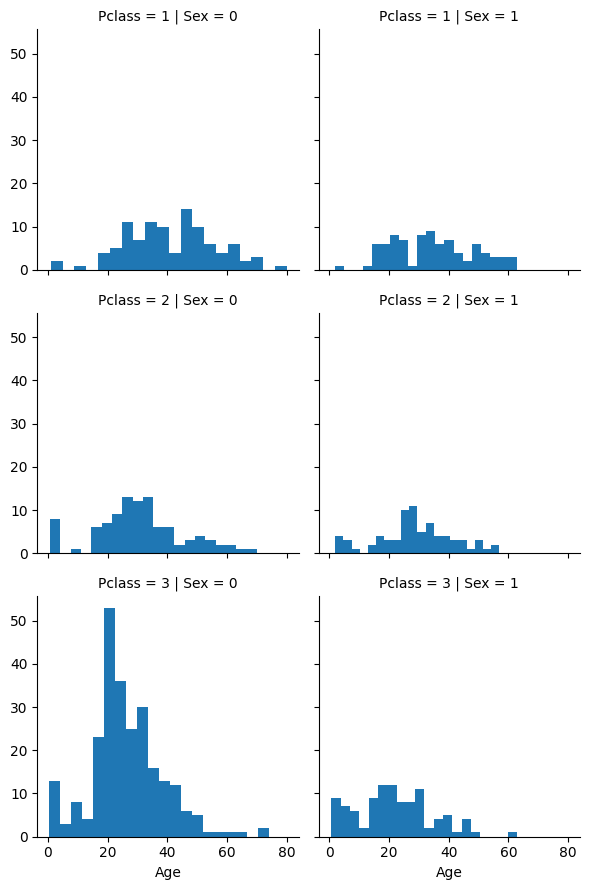

In [27]:
# plot histogram of how age varies across Pclass and Sex

# subdivide pclass and sex into different subplots
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex')

# map it out 
grid.map(plt.hist, 'Age', bins=20)

#### **Fill Null values in Age with Median values from correlated features**

In [28]:
# check how many age rows are null
print(dataset['Age'].isnull().sum())

# prepare empty array to contain guessed Age values based on pclass x gender combinations
guess_ages = np.zeros((2,3))

# iterate over sex(0,1) and pclass(1,2,3) to remove rows with NaN values

for dataset in combine:
    for i in range (0,2):
        for j in range (0,3):
            #select sex and pclass, then select age and unselect rows with missing (select only rows that have values) 
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            #compute median age using the previously selected rows
            guess_median = guess_df.median()

            #standardise and convert to each median age to nearest .5 age
            guess_ages[i,j] = int( guess_median/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            # look for age is null values and same as nested loop values and replace with median values
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    
    #converts to integer data type
    dataset['Age'] = dataset['Age'].astype(int)
    
#display
train_df.head() 

# check how many age rows are null
print(dataset['Age'].isnull().sum())

86
0


Empty age rows successfully filled.

#### **Create AgeBand and check correlation against survived**

In [29]:
# create age bands
train_df['AgeBand']=pd.cut(train_df['Age'],5)

# test correlation between ageband and survival rate
(train_df[['AgeBand','Survived']]
    .groupby(['AgeBand'], as_index=False)
    .mean()
    .sort_values(by=['Survived'], ascending = False)
)

C:\Users\colin\AppData\Local\Temp\ipykernel_2092\3170391688.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (train_df[['AgeBand','Survived']]


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


**Replace Age with ordinals based on these age bands**

In [30]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,5,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,1,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,5,"(32.0, 48.0]"


**Drop AgeBand feature from feature set**

In [31]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,5


## **Feature Engineering - Family Size**

Create a new feature called family size that combines Parch and Sibsp.

In [32]:
# create the feature
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1    # +1 for the individual
    
# test correlation to survived
(train_df[['FamilySize','Survived']]
     .groupby(['FamilySize'],as_index=False)
     .mean()
     .sort_values(by='Survived',ascending=False)
)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


## **Feature Engineering - IsAlone**

Create a new feature from family size called isalone that counts solo passengers.

In [33]:
#create the feature
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1


# test correlation to survived
(train_df[['IsAlone','Survived']]
     .groupby(['IsAlone'],as_index=False)
     .mean()
     .sort_values(by='Survived',ascending=False)
)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### **Fill missing values for Embarked**

Embarked had 2 missing values in training data. Thus we fill it with the most common occurance.

In [34]:
# from embarked column, select null values, drop it, then calculate the first index of the mode of embarked

embarked_freq = train_df['Embarked'].dropna().mode()[0]
print(embarked_freq)

S


In [35]:
# print to check number of null rows in embarked
print(train_df['Embarked'].isnull().sum())

# fill in the null values for embarked in dataset
#for dataset in combine:
    #dataset['Embarked'] = dataset['Embarked'].fillna(embarked_freq)
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_freq)

# print to check number of null rows in embarked
print(train_df['Embarked'].isnull().sum())

2
0


#### **Convert Embarked cateogorical to numerical feature**

In [36]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':1}).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,5,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,5,1,1


## **Feature Engineering - Fare**

#### **Fill Missing Values**

In this case we use median instead of mode(previously in embarked it was mode) was median accounts for outliers in the data, ie. expensive ticket prices or people who did not pay/have a fare.

In [37]:
# print to check number of null rows in fare
print(test_df['Fare'].isnull().sum())
print(train_df['Fare'].isnull().sum())

1
0


In [38]:
# fill in the null values for fare in test data 
fare_median = test_df['Fare'].dropna().median()
test_df['Fare'] = test_df['Fare'].fillna(fare_median)

# print to check number of null rows in embarked
print(test_df['Fare'].isnull().sum())

0


#### **Create FareBands**

In [39]:
# split fare into bands
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)

# test correlation to survived
(train_df[['FareBand','Survived']]
 .groupby('FareBand',as_index=False)
 .mean()
 .sort_values(by=['FareBand'],ascending=False)
)

C:\Users\colin\AppData\Local\Temp\ipykernel_2092\2317712557.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (train_df[['FareBand','Survived']]


,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


#### **Convert to Ordinal Values**

In [40]:
# convert fare into ordinal values
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare']>31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

#print check
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,5,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,1,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,1,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,5,1,1,"(7.91, 14.454]"


## **Final check for data features**

#### **Dropping features**

Drop
- name
- sibsp
- parch
- ticket
- fare
- cabin
- fare band e

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,5,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,1,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,1,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,5,1,1,"(7.91, 14.454]"


In [42]:
# drop features

train_df = train_df.drop(['Name','SibSp','Parch','Ticket','Cabin','FareBand'],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,1,0,0,5,2,0
1,2,1,1,1,2,3,1,1,2,0
2,3,1,3,1,1,1,0,2,1,1
3,4,1,1,1,2,3,0,1,2,0
4,5,0,3,0,2,1,0,5,1,1


In [43]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,NaN,1,5.0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,NaN,0,1.0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,NaN,1,5.0,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,NaN,0,5.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,NaN,0,1.0,3,0


In [44]:
test_df = test_df.drop(['Name','SibSp','Parch','Ticket','Cabin'],axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,1,5.0,1,1
1,893,3,1,2,0,0,1.0,2,0
2,894,2,0,3,1,1,5.0,1,1
3,895,3,0,1,1,0,5.0,1,1
4,896,3,1,1,1,0,1.0,3,0


#### **Check null values**

In [45]:
# training data 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   Age          891 non-null    int32
 5   Fare         891 non-null    int32
 6   Embarked     891 non-null    int32
 7   Title        891 non-null    int64
 8   FamilySize   891 non-null    int64
 9   IsAlone      891 non-null    int64
dtypes: int32(4), int64(6)
memory usage: 55.8 KB


In [46]:
# test data 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    int32  
 5   Embarked     418 non-null    int32  
 6   Title        418 non-null    float64
 7   FamilySize   418 non-null    int64  
 8   IsAlone      418 non-null    int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 23.0 KB


## **Model, Predict and Solve**

Since our problem is supervised learning with classification, the models we can use are:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

#### **Prepare training and test dataframe**

In [47]:
X_train = train_df.drop(['PassengerId','Survived'],axis=1)
Y_train = train_df['Survived']

X_test = test_df.drop('PassengerId',axis=1).copy()
# copy() is used to ensure any changes made does not affect original test_df
# not needed for X_train as it is understood that changes wil be made to training data

In [48]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,1,0,0,5,2,0
1,1,1,2,3,1,1,2,0
2,3,1,1,1,0,2,1,1
3,1,1,2,3,0,1,2,0
4,3,0,2,1,0,5,1,1


In [49]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,2,0,1,5.0,1,1
1,3,1,2,0,0,1.0,2,0
2,2,0,3,1,1,5.0,1,1
3,3,0,1,1,0,5.0,1,1
4,3,1,1,1,0,1.0,3,0


#### **Support Vector Machines**

In [50]:
#svm

# initialise support vector classifier model
svc = SVC()

# train the svc model using the training data with svc.fit()
svc.fit(X_train, Y_train)

# make prediction on test data with svc.predict()
Y_pred_svc = svc.predict(X_test)

# calculate accuracy of the svc model on the training data with svc.score()
acc_svc_train = round(svc.score(X_train, Y_train)*100,2)

# print acc score
acc_svc

NameError: name 'acc_svc' is not defined

#### **k-nearest Neighbors (k-NN)**

In [ ]:
# k-NN

# initialise k-nn classifier
knn = KNeighborsClassifier(n_neighbors=5)

# train knn model
knn.fit(X_train, Y_train)

# predict
Y_pred_knn = knn.predict(X_test)

# calculate accuracy
acc_knn = round(knn.score(X_train,Y_train)*100,2)

# print acc score
acc_knn

83.84

#### **Decision Tree**

In [ ]:
# decision tree

# initialise decisiontreeclassifier
dt = DecisionTreeClassifier(max_depth = 5)

# train the model
dt.fit(X_train,Y_train)

# predict on test data
Y_pred_dt = dt.predict(X_test)

# calculate accuracy
acc_dt = round(dt.score(X_train,Y_train) * 100,2)

# print acc score
acc_dt

84.29

#### **Random Forest**

In [ ]:
# random forest

# initialise classifier
rf = RandomForestClassifier(n_estimators = 100)

# train the model
rf.fit(X_train,Y_train)

# predict on test data
Y_pred_rf = rf.predict(X_test)

# calculate accuracy
acc_rf = round(rf.score(X_train,Y_train)*100,2)

# print acc score
acc_rf

88.22

#### **Model Evaluation**

In [ ]:
# create a dict to store the model names and scores
model_scores = {
    'Model': [
        'Support Vector Machines',
        'k-NN',
        'Decision Tree',
        'Random Forest'
    ],
    'Algorithm Score':[
        acc_svc,
        acc_knn,
        acc_dt,
        acc_rf
    ]
}


# create a df 
model_eval = pd.DataFrame(model_scores)


# sort the df
model_eval.sort_values(by='Algorithm Score',ascending = False)

,Model,Algorithm Score
3,Random Forest,88.22
2,Decision Tree,84.29
1,k-NN,83.84
0,Support Vector Machines,82.83


#### **Create Submission File**

In [ ]:
# create submission file for kaggle 

submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred_rf
})

submission.to_csv('submission.csv', index=False)